In [39]:
import numpy as np
from matplotlib import rcParams, cycler
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from qp_solver import *

#### Just print problem shapes:

In [2]:
problem_files = get_complete_filenames_with_path()
num_iter = 300
prob_num_init = 0
prob_num_end = 50
prob_num_step = 1
num_prob = np.ceil((prob_num_end - prob_num_init) / prob_num_step).astype(int)
problems = []
for pf_idx, pf in enumerate(problem_files[prob_num_init:prob_num_end:prob_num_step]):
    qpp = QPProblemNumPy(pf)
    print(qpp.Q.shape, qpp.A.shape)

(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(264, 264) (144, 264)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(2424, 2424) (1224, 2424)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(3624, 3624) (1824, 3624)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)
(4824, 4824) (2424, 4824)


#### Solve problems

##### Record costs, constraint_sats, osqp_costs

In [2]:
problem_files = get_complete_filenames_with_path()
num_iter = 300
prob_num_init = 50
prob_num_end = 60
prob_num_step = 1
num_prob = np.ceil((prob_num_end - prob_num_init) / prob_num_step).astype(int)

costs = np.zeros((num_iter // 2 - 1, num_prob))  # , len(num_iters)))
constraint_sats = np.zeros((num_iter // 2 - 1, num_prob))
osqp_costs = np.zeros((num_prob,))
final_state_x_norms = np.zeros((num_prob,))
condition_numbers_q = np.zeros((num_prob,))
condition_numbers_a = np.zeros((num_prob,))

for pf_idx, pf in enumerate(problem_files[prob_num_init:prob_num_end:prob_num_step]):
    qpp = QPProblemNumPy(pf)
    print(qpp.problem_file.split('/')[-1], end=" ", flush=True)
    print(qpp.perturb_settings.noise_ampl, flush=True)

    qpsolver = QPSolverNumPy(qpp=qpp, num_iter=num_iter)
    qpsolver.solve()
    qpsolver.osqp_solve()

    # Catalogue costs and constraint satisfaction
    costs[:, pf_idx] = np.array(qpsolver.cost)
    constraint_sats[:, pf_idx] = np.array(qpsolver.constraint_sat)
    osqp_costs[pf_idx] = qpsolver.osqp_res.info.obj_val
    final_state_x_norms[pf_idx] = np.linalg.norm(qpsolver.state_var_x_py)

mpc_8400_0150.npz 0.0
Solving.. Done
mpc_8400_0300.npz 0.0
Solving.. Done
mpc_8400_0500.npz 0.0
Solving.. Done
mpc_8400_0700.npz 0.0
Solving.. Done
mpc_8400_0800.npz 0.0
Solving.. Done
mpc_8400_0900.npz 0.0
Solving.. Done
mpc_8400_1200.npz 0.0
Solving.. Done
mpc_8400_1500.npz 0.0
Solving.. Done
mpc_8400_1800.npz 0.0
Solving.. Done
mpc_8400_2000.npz 0.0
Solving.. Done


##### Normalize costs and constraint_sats

In [3]:
normalized_costs = costs/osqp_costs
normalized_constraint_sats = constraint_sats/final_state_x_norms

##### Save costs, constraint_sats, normalized costs, etc.

In [27]:
np.savez("/home/sumedhrr/neurips23-qp/NeuRIPS_data/anymal_quadruped/costs_constsat_sol_ni300_nonoise_264_8424.npz", 
         costs=costs, 
         constraint_sats=constraint_sats,
         final_state_x_norms=final_state_x_norms,
         normalized_costs=normalized_costs,
         normalized_constraint_sats=normalized_constraint_sats)

In [5]:
matrices = np.load("/home/sumedhrr/neurips23-qp/NeuRIPS_data/anymal_quadruped/costs_constsat_sol_ni300_nonoise_264_7224.npz")
costs, constraint_sats, final_state_x_norms, normalized_costs, normalized_constraint_sats = \
[matrices[i] for i in matrices]
matrices8 = np.load("/home/sumedhrr/neurips23-qp/NeuRIPS_data/anymal_quadruped/costs_constsat_sol_ni300_nonoise_8400.npz")
costs8, constraint_sats8, final_state_x_norms8, normalized_costs8, normalized_constraint_sats8 = \
[matrices8[i] for i in matrices8]

In [12]:
final_state_x_norms.shape, final_state_x_norms8.shape, normalized_costs.shape, normalized_costs8.shape, normalized_constraint_sats.shape, normalized_constraint_sats8.shape

((50,), (10,), (149, 50), (149, 10), (149, 50), (149, 10))

In [13]:
costs = np.hstack((costs, costs8))
constraint_sats = np.hstack((constraint_sats, constraint_sats8))
final_state_x_norms = np.hstack((final_state_x_norms, final_state_x_norms8))
normalized_costs = np.hstack((normalized_costs, normalized_costs8))
normalized_constraint_sats = np.hstack((normalized_constraint_sats, normalized_constraint_sats8))

In [14]:
osqp_costs = costs/normalized_costs

In [44]:
mean_costs = []
max_costs = []
min_costs = []
std_costs = []
mean_csats = []
max_csats = []
min_csats = []
std_csats = []
for j in range(6):
    mean_costs.append(np.mean(costs[:, j*10:(j+1)*10], axis=1))
    max_costs.append(np.max(costs[:, j*10:(j+1)*10], axis=1))
    min_costs.append(np.min(costs[:, j*10:(j+1)*10], axis=1))
    std_costs.append(np.std(costs[:, j*10:(j+1)*10], axis=1))
    mean_csats.append(np.mean(constraint_sats[:, j*10:(j+1)*10], axis=1))
    max_csats.append(np.max(constraint_sats[:, j*10:(j+1)*10], axis=1))
    min_csats.append(np.min(constraint_sats[:, j*10:(j+1)*10], axis=1))
    std_csats.append(np.std(constraint_sats[:, j*10:(j+1)*10], axis=1))

In [45]:
mean_costs = np.array(mean_costs).T
min_costs = np.array(min_costs).T
max_costs = np.array(max_costs).T
std_costs = np.array(std_costs).T
mean_csats = np.array(mean_csats).T
min_csats = np.array(min_csats).T
max_csats = np.array(max_csats).T
std_csats = np.array(std_csats).T

In [46]:
mean_osqp_costs = []
max_osqp_costs = []
min_osqp_costs = []
for j in range(6):
    mean_osqp_costs.append(np.mean(osqp_costs[j*10:(j+1)*10]))
    min_osqp_costs.append(np.min(osqp_costs[j*10:(j+1)*10]))
    max_osqp_costs.append(np.max(osqp_costs[j*10:(j+1)*10]))
mean_osqp_costs = np.array(mean_osqp_costs)
min_osqp_costs = np.array(min_osqp_costs)
max_osqp_costs = np.array(max_osqp_costs)

In [47]:
mean_normalized_costs = []
std_normalized_costs = []
for j in range(6):
    mean_normalized_costs.append(np.mean(normalized_costs[:, j*10:(j+1)*10], axis=1))
    std_normalized_costs.append(np.std(normalized_costs[:, j*10:(j+1)*10], axis=1))

In [48]:
mean_normalized_csats = []
std_normalized_csats = []
for j in range(6):
    mean_normalized_csats.append(np.mean(normalized_constraint_sats[:, j*10:(j+1)*10], axis=1))
    std_normalized_csats.append(np.std(normalized_constraint_sats[:, j*10:(j+1)*10], axis=1))

In [49]:
mean_normalized_costs = np.array(mean_normalized_costs).T
std_normalized_costs = np.array(std_normalized_costs).T

In [50]:
mean_normalized_csats = np.array(mean_normalized_csats).T
std_normalized_csats = np.array(std_normalized_csats).T

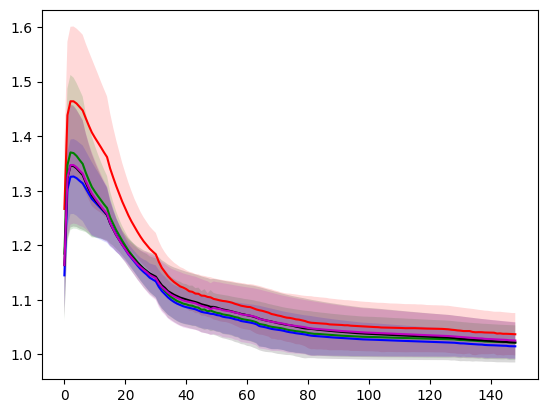

In [11]:
rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'k', 'm'])
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_costs[:, 0].size), mean_normalized_costs[:, k]-std_normalized_costs[:, k], mean_normalized_costs[:, k]+std_normalized_costs[:, k], alpha=0.15)
    plt.plot(mean_normalized_costs[:, k])
plt.show()

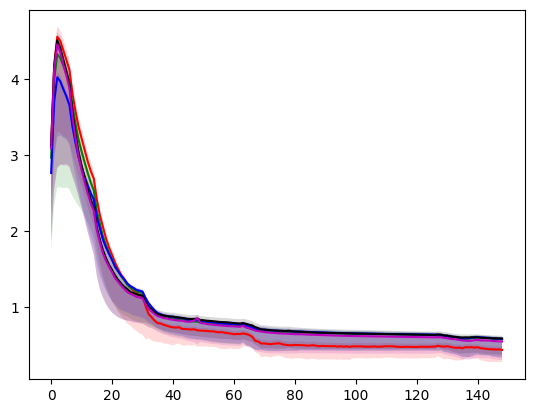

In [23]:
rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'k', 'm'])
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_csats[:, 0].size), mean_normalized_csats[:, k]-std_normalized_csats[:, k], mean_normalized_csats[:, k]+std_normalized_costs[:, k], alpha=0.15)
    plt.plot(mean_normalized_csats[:, k])
plt.show()

In [48]:
mean_costs.shape, mean_osqp_costs.shape

((149, 5), (5,))

/tmp/ipykernel_1864934/1196541279.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")
/tmp/ipykernel_1864934/1196541279.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")
/tmp/ipykernel_1864934/1196541279.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax.get_xticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")


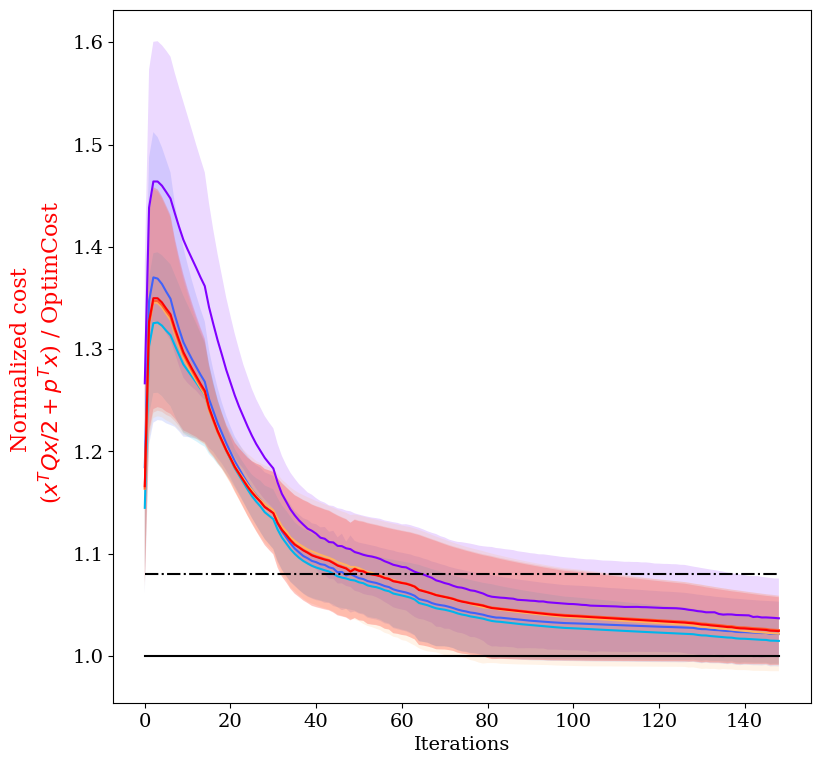

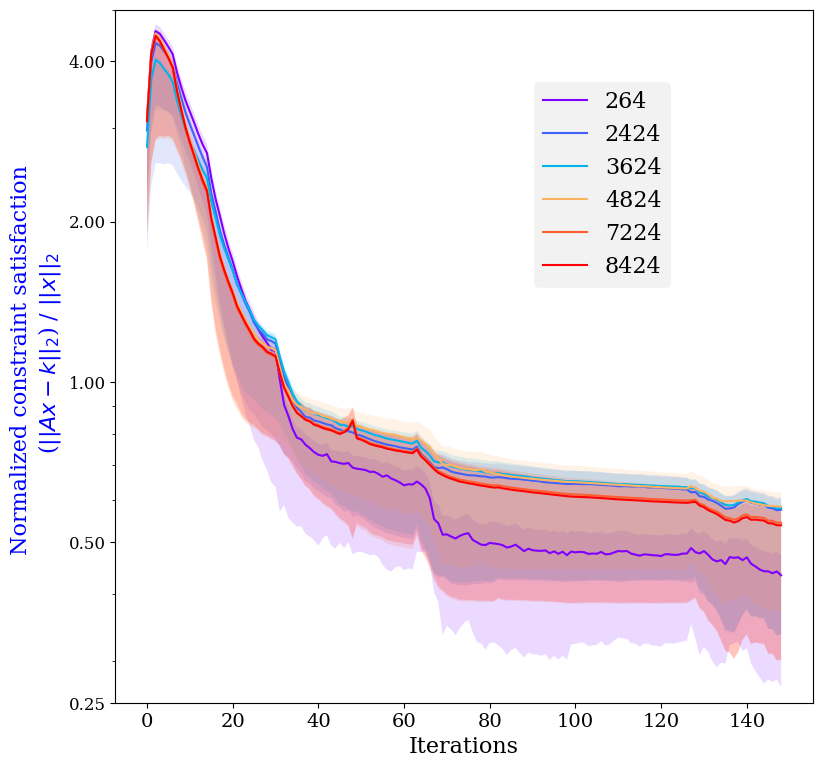

In [82]:
cmap = plt.cm.rainbow
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 0.25, 3).tolist() + np.linspace(0.75, 1, 3).tolist()))
# normalized_cond_num_q = np.interp(condition_numbers_q, (condition_numbers_q.min(), condition_numbers_q.max()), (0, 1))
# normalized_cond_num_a = np.interp(condition_numbers_a, (condition_numbers_a.min(), condition_numbers_a.max()), (0, 1))
# rcParams['axes.prop_cycle'] = cycler(color=['y', 'g', 'b', 'c', 'm', 'r'])

# rcParams['axes.prop_cycle'] = cycler(color=cmap(normalized_cond_num_q))
fig, ax = plt.subplots(figsize=(9, 9))
for k in range(6):
    plt.fill_between(np.arange(mean_normalized_costs[:, 0].size), 
                     mean_normalized_costs[:, k] - std_normalized_costs[:, k], 
                     mean_normalized_costs[:, k] + std_normalized_costs[:, k], 
                     alpha=0.15)
plt.plot(mean_normalized_costs)
# ax.plot(mean_costs/mean_osqp_costs)
ax.plot(1.08 * np.ones_like(normalized_costs[:, 0]), '-.k')
ax.plot(np.ones_like(normalized_costs[:, 0]), '-k')
ax.set_ylabel("Normalized cost \n ($x^T Q x/2 + p^T x$) / OptimCost",color="red",fontsize=16, fontfamily="serif")
ax.set_xlabel("Iterations", fontsize=14, fontfamily="serif")
ax.set_xticklabels(ax.get_xticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")
ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")
# ax.set_ylim([0.95, 1.05])
# ax.set_xlim([1001, 1200])

# rcParams['axes.prop_cycle'] = cycler(color=cmap(normalized_cond_num_a))
fig2, ax2 = plt.subplots(figsize=(9, 9))
ax2.set_yscale('log')
# ax2.plot(normalized_constraint_sats)
for k in range(6):
    plt.fill_between(np.arange(mean_normalized_csats[:, 0].size), 
                     mean_normalized_csats[:, k] - std_normalized_csats[:, k], 
                     mean_normalized_csats[:, k] + std_normalized_costs[:, k], 
                     alpha=0.15)
lines = plt.plot(mean_normalized_csats)
ax2.set_ylabel("Normalized constraint satisfaction \n ($||Ax-k||_2$) / $||x||_2$",color="blue", fontsize=16, fontfamily="serif")
ax2.set_xlabel("Iterations",fontsize=16, fontfamily="serif")
ax2.set_xticklabels(ax.get_xticklabels(), fontdict={"fontsize": 14}, fontfamily="serif")
ax2.set_ylim([0.25, 5])
ax2.set_yticks(np.logspace(np.log2(0.25), np.log2(4), 5, base=2), 
               ["%.2f"%tick for tick in np.logspace(np.log2(0.25), np.log2(4), 5, base=2)],
               fontsize=12, fontfamily="serif")
font = font_manager.FontProperties(family='serif', size=16)
ax2.legend(lines, ["264", "2424", "3624", "4824" ,"7224", "8424"], framealpha=0.05, facecolor="k", prop=font, loc=(.6, .6))
plt.show()

In [26]:
condition_numbers_q, condition_numbers_a

(array([13.057175  , 13.06875296, 13.00042249, 14.46940888, 16.89580274,
        53.30882068, 16.09808769, 14.88387096, 16.83022024, 12.00551582]),
 array([91.82769739, 92.15501323, 91.82769732, 68.01261723, 80.68751316,
        83.9323787 , 75.58301084, 63.05004809, 73.21365072, 70.52649428]))

In [71]:
crossingpts_mean = []
crossingpts_mean_min_std = []
crossingpts_mean_plu_std = []
for k in range(6):
    crossingpts_mean.append(np.nonzero((mean_normalized_costs[:, k] <= 1.085 * np.ones_like(mean_normalized_costs[:, k])) * (mean_normalized_costs[:, k] >= 1.075 * np.ones_like(mean_normalized_costs[:, k]))))
    crossingpts_mean_min_std.append(np.nonzero((mean_normalized_costs[:, k] - std_normalized_costs[:, k] <= 1.085 * np.ones_like(mean_normalized_costs[:, k])) * (mean_normalized_costs[:, k] - std_normalized_costs[:, k] >= 1.075 * np.ones_like(mean_normalized_costs[:, k]))))
    crossingpts_mean_plu_std.append(np.nonzero((mean_normalized_costs[:, k] + std_normalized_costs[:, k]<= 1.085 * np.ones_like(mean_normalized_costs[:, k])) * (mean_normalized_costs[:, k] + std_normalized_costs[:, k] >= 1.075 * np.ones_like(mean_normalized_costs[:, k]))))

In [72]:
crossingpts_mean, crossingpts_mean_min_std, crossingpts_mean_plu_std

([(array([62, 63, 64, 65, 66, 67]),),
  (array([45, 46, 47, 48, 49, 50, 51]),),
  (array([42, 43, 44, 45, 46, 47]),),
  (array([51, 52, 53, 54, 55, 56, 57]),),
  (array([48, 50, 51, 52, 53, 54, 55, 56, 57]),),
  (array([48, 50, 51, 52, 53, 54, 55, 56, 57]),)],
 [(array([40, 41, 42, 43, 44]),),
  (array([32, 33]),),
  (array([32, 33]),),
  (array([32]),),
  (array([32]),),
  (array([32]),)],
 [(array([132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
          145, 146, 147, 148]),),
  (array([74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]),),
  (array([67, 68, 69, 70, 71, 72, 73, 74, 75]),),
  (array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
          114, 115, 116, 117, 118, 119, 120]),),
  (array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
          111, 112, 113, 114, 115, 116, 117, 118, 119]),),
  (array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
          109, 110, 111, 112, 113, 114, 115, 116

In [73]:
meanpts = [65, 48, 45, 54, 53, 53]
stdminuspts = [42, 32, 32, 32, 32, 32]
stdpluspts = [140, 80, 71, 111, 108, 106]

In [74]:
problem_sizes = [264, 2424, 3624, 4824, 7224, 8424]

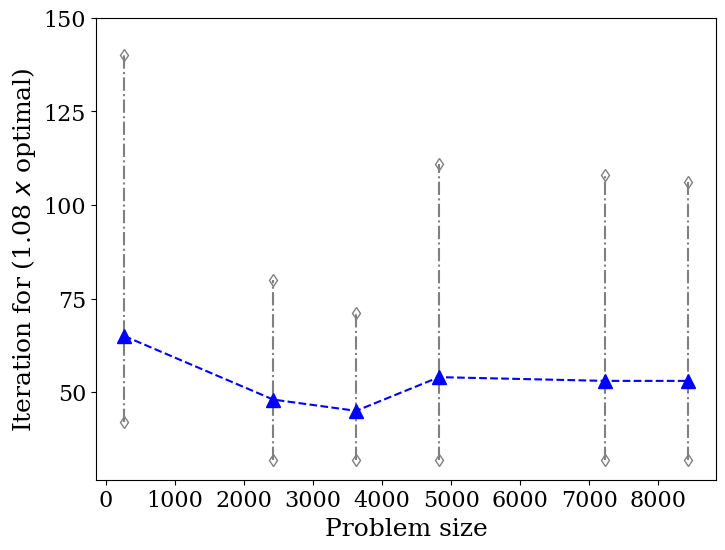

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))
plotlines, caplines, barlinecols = plt.errorbar(problem_sizes, meanpts, 
                                                np.vstack((np.array(meanpts) - np.array(stdminuspts), 
                                                           np.array(stdpluspts) - np.array(meanpts))), 
                                                marker="^", ms=10, ecolor="gray", color="b", linestyle="--", capsize=1)
plt.xlabel("Problem size", fontsize=18, fontfamily="serif")
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], ["0", "1000" , "2000", "3000", "4000", "5000", "6000", "7000", "8000"], fontsize=16, fontfamily="serif")
plt.ylabel("Iteration for (1.08 $x$ optimal)", fontsize=18, fontfamily="serif")
plt.yticks([50, 75, 100, 125, 150], ["50", "75", "100", "125", "150"], fontsize=16, fontfamily="serif")
barlinecols[0].set_linestyles("-.")
caplines[0].set_marker("d")
caplines[0].set_markersize(6)
caplines[0].set_markerfacecolor("none")
caplines[1].set_marker("d")
caplines[1].set_markersize(6)
caplines[1].set_markerfacecolor("none")
plt.show()

In [128]:
np.vstack((stdminuspts, stdpluspts))

array([[ 42,  32,  32,  32,  32],
       [140,  80,  71, 111, 108]])